# 학생 SNS 중독 조사 데이터셋

학생들이 SNS를 사용실태 및 정신건강, 수면 시간, 관계 등의 정보를 담은 데이터셋이다   
이번 시간을 통해서 데이터 분석의 기초, 어떤 생각을 하면 좋을지, 인사이트를 어떻게 만드는 지 등을 알아보자   

Dataset(Kaggle) : https://www.kaggle.com/datasets/pratyushpuri/students-social-media-addiction

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/students-social-media-addiction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ahris\.cache\kagglehub\datasets\pratyushpuri\students-social-media-addiction\versions\1


In [7]:
import os
import shutil

data_path = "./datas"

if not os.path.exists(data_path):
    shutil.copytree(path, data_path)
else:
    print("데이터가 이미 옮겨졌습니다")

데이터가 이미 옮겨졌습니다


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [9]:
df = pd.read_csv("./datas/Students Social Media Addiction.csv")
print(df.shape)

(705, 13)


In [10]:
# 데이터의 개략적인 정보 파악
df.info()

# 매우 깔끔한 데이터, null 이라는 결측치가 없고 모든 열의 데이터가 705개로 정확히 맞추어져 있음

<class 'pandas.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    str    
 3   Academic_Level                705 non-null    str    
 4   Country                       705 non-null    str    
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    str    
 7   Affects_Academic_Performance  705 non-null    str    
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    str    
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: float64(2), i

In [11]:
# 실제 데이터 구조 확인
# data.head(n= 5), 비슷하게 tail()이 있음
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [12]:
# 수로 표현 수치형 데이터의 메타적인 통계 정보 확인하기
df.describe()

# 수치형 데이터는 너무 깔끔해서 건드릴게 없다.
# 결측치 처리, 이상치 처리, 데이터 증강 등은 다른 데이터에서 해보자

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


이 데이터는 18세(min)에서 24살(max)의 사람들이 하루에 휴대폰을 사용하는 시간과 정신건강, SNS에서 갈등, 중독 정도를 담은 데이터구나.   
평균 SNS 사용량과 밤에 잠자는 시간을 따로 나타내며, 잘은 모르겠지만 소셜미디어에서 갈등이라는 항목도 있네?

In [13]:
# 데이터가 포함하는 열의 이름들 불러오기
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='str')

전체 항목을 보면, 재학 상태, 나라, 소셜미디어가 성적에 영향을 미치는지, 교우 관계는 어떻게 되는지가 들어가 있구나

In [14]:
# 특정 열 조회
df["Gender"]

# 이런 식의 텍스트 데이터는 통계를 낼 때 불편하니까 숫자로 바꾸어야겠다.
# 보통 남자는 0, 여자는 1로 바꾸는 편이다

0      Female
1        Male
2      Female
3        Male
4        Male
        ...  
700    Female
701      Male
702    Female
703      Male
704    Female
Name: Gender, Length: 705, dtype: str

In [15]:
# map, replace 등의 방법이 있음
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
print(df.head())

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19       1  Undergraduate  Bangladesh                    5.2   
1           2   22       0       Graduate       India                    2.1   
2           3   20       1  Undergraduate         USA                    6.0   
3           4   18       0    High School          UK                    3.0   
4           5   21       0       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

마찬가지로 Academic_Level, Country, Most_Used_Platform, Relationship_Status 등을 바꿔보자.   
그전에 Country는 우리가 내려는 인사이트에 필요한 데이터일까?   
굳이 나라별로 할 필요가 없으니까, 없애자

In [16]:
df = df.drop(labels=['Country'], axis=1)

In [17]:
# 일단 바꾸기 전에, 데이터의 특성을 파악해야 한다
cols = ['Academic_Level', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

for col in cols:
    print(f'- {col} -')
    print(df[col].unique())
    print("-" * 30)

- Academic_Level -
<StringArray>
['Undergraduate', 'Graduate', 'High School']
Length: 3, dtype: str
------------------------------
- Most_Used_Platform -
<StringArray>
['Instagram',   'Twitter',    'TikTok',   'YouTube',  'Facebook',  'LinkedIn',
  'Snapchat',      'LINE', 'KakaoTalk', 'VKontakte',  'WhatsApp',    'WeChat']
Length: 12, dtype: str
------------------------------
- Affects_Academic_Performance -
<StringArray>
['Yes', 'No']
Length: 2, dtype: str
------------------------------
- Relationship_Status -
<StringArray>
['In Relationship', 'Single', 'Complicated']
Length: 3, dtype: str
------------------------------


1. Relationship_Status는 아무래도 연인 관계를 나타내는 것 같다. Complicated가 무슨 뜻인지는 모르겠지만, 소셜 미디어가 연인 관계에 어떤 영향을 미치는지를 봐볼수도 있겠다   

2. Most_Used_Platform은 어떤 앱을 사용하는 빈도가 많은지를 나타내는데, 각 플랫폼 별로 청소년 정신 건강, 수면 시간 등의 상관 관게를 봐도 재미있겠다   

3. Academic_Level을 선택해보면, 학업의 정도에 따른 중독과의 상관 관계를 나타내볼 수 있겠다   

4. Affects_Academic_Performance은 말 그대로 SNS 사용량과 수면 시간이 성적에 영향이 있는지 없는지를 알 수 있겠다   

일단, 데이터 분석을 위해서 텍스트들을 전부 숫자형으로 바꾸어 주자

In [18]:
# Affects_Academic_Performance 은 딱 두 개에 불리안 형이니 Yes는 1로, No는 0으로 만들자

df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].map({'Yes':1, 'No':0})

In [19]:
# Academin_Lavel도 마찬가지, 학력 수준에 따른 차이니까 숫자로 바로 바꾸어도 문제가 안 생기겠다
academic_map = {
    'High School': 0,
    'Undergraduate': 1,
    'Graduate': 2
}

df['Academic_Level'] = df['Academic_Level'].map(academic_map)

In [21]:
# Most_Used_Platform은 어쩌지? 만약, youtube는 0이고 tictok은 1이면, 틱톡이 유튜브 보다 더 크다는 건가?
# 의미상 뭔가 이상하니까, 원-핫 인코딩(One-Hot Encoding)을 하자

df = pd.get_dummies(df, columns=['Most_Used_Platform'])

In [22]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level',
       'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Most_Used_Platform_Facebook', 'Most_Used_Platform_Instagram',
       'Most_Used_Platform_KakaoTalk', 'Most_Used_Platform_LINE',
       'Most_Used_Platform_LinkedIn', 'Most_Used_Platform_Snapchat',
       'Most_Used_Platform_TikTok', 'Most_Used_Platform_Twitter',
       'Most_Used_Platform_VKontakte', 'Most_Used_Platform_WeChat',
       'Most_Used_Platform_WhatsApp', 'Most_Used_Platform_YouTube'],
      dtype='str')

In [23]:
# 사용한다고 표시한 것에만 True가 표시됐다!
df.head()

# 종류가 너무 많다고 생각이 들면, 인스타 같은 게시형 SNS, LINE 같은 소통형 SNS,
# Youtube 같은 동영상 SNS 등으로 그룹화 해서 3개에서 4개로 콜럼을 줄일 수도 있겠다

# 그래서 여기서 과제
# Video,"YouTube, TikTok"
# Social/Feed,"Instagram, Facebook, Twitter, LinkedIn"
# Messenger,"WhatsApp, KakaoTalk, LINE, WeChat"
# Others,"Snapchat, VKontakte 등"

# 이렇게 4개의 열로 그룹화 해서 다시 데이터 만들어보기

,Student_ID,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
0,1,19,1,1,5.2,1,6.5,6,In Relationship,3,...,False,False,False,False,False,False,False,False,False,False
1,2,22,0,2,2.1,0,7.5,8,Single,0,...,False,False,False,False,False,True,False,False,False,False
2,3,20,1,1,6.0,1,5.0,5,Complicated,4,...,False,False,False,False,True,False,False,False,False,False
3,4,18,0,0,3.0,0,7.0,7,Single,1,...,False,False,False,False,False,False,False,False,False,True
4,5,21,0,2,4.5,1,6.0,6,In Relationship,2,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Relationship_Status는 어떻게 하면 좋을까?
# 일단 데이터를 확인해보자

df['Relationship_Status'].value_counts()

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

Avg_Dailt_Usage_Hours와 상관 관계를 봐볼까

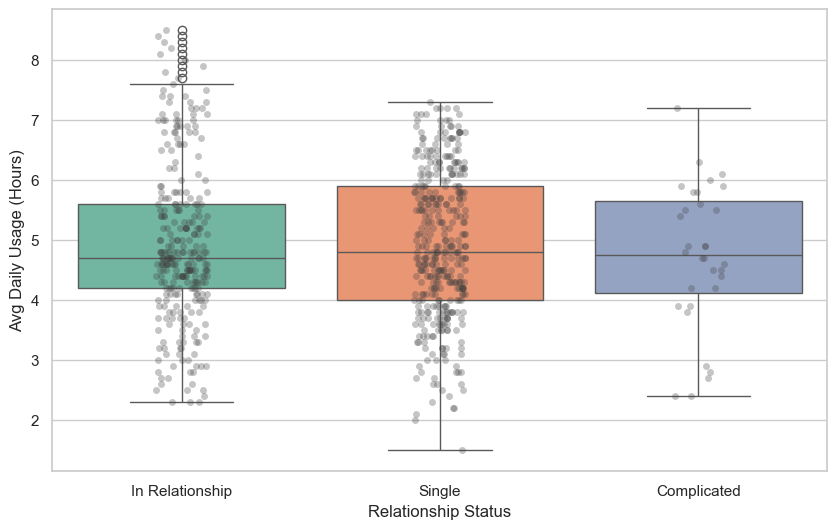

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# x축은 관계 상태, y축은 일일 평균 사용 시간
ax = sns.boxplot(x='Relationship_Status', y='Avg_Daily_Usage_Hours', data=df, palette='Set2', hue='Relationship_Status')

sns.stripplot(x='Relationship_Status', y='Avg_Daily_Usage_Hours', data=df, color=".25", alpha=0.3)

plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Avg Daily Usage (Hours)', fontsize=12)

plt.show()

아무래도, Comlicated는 없어도 되겠는걸   
데이터 양도 적고, 실상 분석의 목표에도 안 맞는다.   
사용시간에 따른 편차도 너무 커서, 노이즈 그 이상도 이하도 아닌 것 같다.   
그러면 이걸 Single에 묶어버릴까? 아냐, 그냥 없애자!   

In [26]:
# 혹시 모르니까 테스트 케이스에 저장
te = df[df['Relationship_Status'] != 'Complicated']

In [27]:
# 성공적으로 없어짐을 확인
te['Relationship_Status'].value_counts()

Relationship_Status
Single             384
In Relationship    289
Name: count, dtype: int64

In [28]:
te.head()

,Student_ID,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
0,1,19,1,1,5.2,1,6.5,6,In Relationship,3,...,False,False,False,False,False,False,False,False,False,False
1,2,22,0,2,2.1,0,7.5,8,Single,0,...,False,False,False,False,False,True,False,False,False,False
3,4,18,0,0,3.0,0,7.0,7,Single,1,...,False,False,False,False,False,False,False,False,False,True
4,5,21,0,2,4.5,1,6.0,6,In Relationship,2,...,False,False,False,False,False,False,False,False,False,False
6,7,23,0,2,1.5,0,8.0,9,Single,0,...,False,False,True,False,False,False,False,False,False,False


In [29]:
# Merge
df = te

In [30]:
# 표현을 더 명확히 하기 위해서
# single = False, in relationship = True로 바꾸고, 행의 이름을 is_Relationship 으로 바꾸기

df['Relationship_Status'] = df['Relationship_Status'].map({'In Relationship':True,'Single':False})

In [31]:
df = df.rename(columns={'Relationship_Status': 'is_Relationship'})

In [32]:
df.tail(n=3)

,Student_ID,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,is_Relationship,Conflicts_Over_Social_Media,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
702,703,21,1,1,5.6,1,6.7,6,True,3,...,False,False,False,False,False,False,False,True,False,False
703,704,24,0,2,4.3,0,7.5,8,False,2,...,False,False,False,False,False,True,False,False,False,False
704,705,19,1,1,6.2,1,6.3,5,False,4,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# 가공이 끝난 데이터 저장

file_name = 'SSMA_'
df.to_csv('./datas/SSMA_Cleaned.csv', index=False)